In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def tokenize(s):
    '''
    Input: 
        String
    Output: 
        List of Strings
    '''
    return s.split()

def preprocess(s, lower=True, strip_punc=True):
    '''
    Input: String, lower(Bool), strip_punc(Bool)
    Output: List of Strings
    '''
    punc = '.-,?<>:;"\'!%'
    if isinstance(s, str):
        s = tokenize(s)
    if lower:
        s = [t.lower() for t in s]
    if strip_punc:
        s = [t.strip(punc) for t in s]
        
    return s

def token_frequency(tokens, tf= None, relative=False):
    """
    Inputs: 
        tokens = List of Strings or None
        tf = dict or None
        relative = Boolean
    Output: 
        Dictionary of a token frequencies
    """
    tf = {} if tf==None else tf
    
    if len(tf) != 0 and relative==True:
        if isinstance(list(tf.items())[0][1], float):
            print('WARNING: Adding raw counts to relative frequency')
            return tf
        
    for token in tokens:
        if token in tf:
            tf[token] += 1
        else:
            tf[token] = 1
    
    if relative:
        total = sum([v for k,v in tf.items()])
        tf = {k:v/total for k, v in tf.items()}
          
    return tf


def calc_percent(headlines):
    total = len(headlines)
    count = 0
    for h in headlines:
        if 'coronavirus' in h:
            count += 1
    return round(count/total * 100, 2)

def word_counts(headlines):
    """
    Input: a list of headlines from news articles
    Output: full word counts for all words from the articles
    """
    # define empty dict to collect all words
    tf = {}
    
    # preprocess all headlines
    headlines = headlines.apply(lambda x: preprocess(x))
    
    # calc token frequency of all word tokens in headlines
    headlines.apply(lambda x: token_frequency(x,tf=tf))
    
    # sort tokens by frequency 
    sorted_tokens = sorted(tf.items(), key= lambda x:x[1], reverse=True)
    for token in sorted_tokens:
        print(token)

In [3]:
# read in cnbc articles
df = pd.read_csv('cnbc_news.csv',parse_dates=['publish_date'], index_col='publish_date').reset_index()

# drop any rows with null
df = df.dropna()

# preprocess text in headlines
df['headline'] = df['headline'].apply(lambda x: preprocess(x))
df.tail()

,publish_date,headline
3432,2020-04-15,"[trump, critic, and, ex-gop, rep, justin, amas..."
3433,2020-04-15,"[new, york, gov, andrew, cuomo, orders, all, p..."
3434,2020-04-15,"[tax, day, is, now, 3, months, away, here, are..."
3435,2020-04-15,"[analyst, sees, the, best, of, times, and, the..."
3436,2020-04-15,"[stock, market, live, updates, dow, down, 300,..."


In [4]:
# calc % of headlines that include the word "coronavirus"
percent_per_day = df.groupby('publish_date')['headline'].apply(lambda x: calc_percent(x))[4:]
print(percent_per_day)

publish_date
2020-03-08    33.33
2020-03-09    43.14
2020-03-10    43.10
2020-03-11    47.83
2020-03-12    50.83
2020-03-13    59.29
2020-03-14    61.90
2020-03-15    53.33
2020-03-16    53.23
2020-03-17    44.36
2020-03-18    44.94
2020-03-19    52.27
2020-03-20    51.30
2020-03-21    69.77
2020-03-22    62.50
2020-03-23    56.20
2020-03-24    51.01
2020-03-25    48.78
2020-03-26    44.74
2020-03-27    54.90
2020-03-28    47.37
2020-03-29    64.71
2020-03-30    49.60
2020-03-31    49.53
2020-04-01    46.59
2020-04-02    42.86
2020-04-03    45.28
2020-04-04    48.57
2020-04-05    51.16
2020-04-06    40.00
2020-04-07    39.83
2020-04-08    38.10
2020-04-09    34.23
2020-04-10    45.45
2020-04-11    50.00
2020-04-12    38.46
2020-04-13    36.17
2020-04-14    41.41
2020-04-15    30.88
Name: headline, dtype: float64


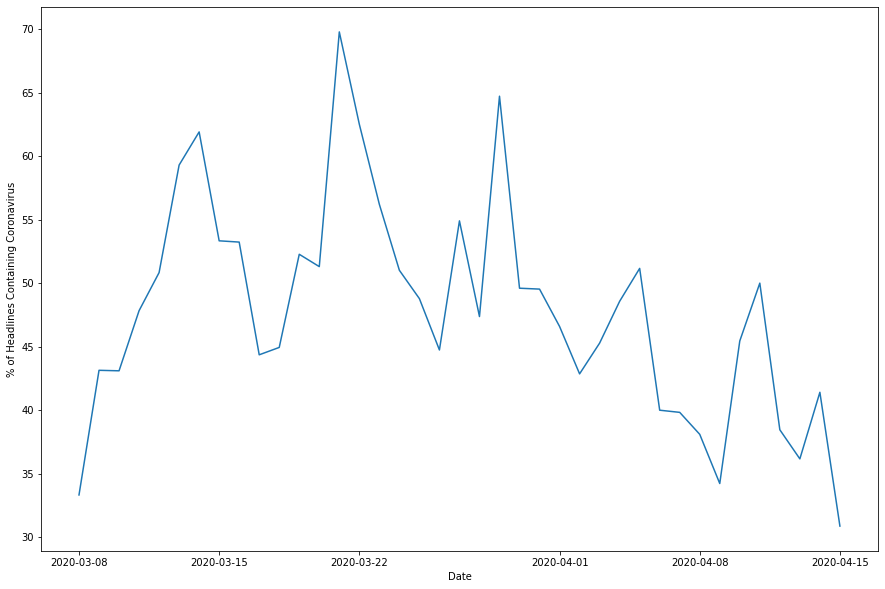

In [9]:
plt.figure(figsize=(15,10))
plt.plot(percent_per_day.index, percent_per_day.values)
plt.xlabel('Date'); plt.ylabel('% of Headlines Containing Coronavirus')
plt.show()

In [5]:
# Show total word counts across all headlines
word_counts(df['headline'])

('coronavirus', 1640)
('to', 1551)
('the', 1104)
('in', 691)
('for', 640)
('and', 582)
('of', 560)
('as', 545)
('says', 536)
('a', 505)
('is', 390)
('on', 336)
('new', 306)
('market', 305)
('us', 287)
('are', 257)
('stocks', 254)
('more', 246)
('live', 246)
('trump', 241)
('stock', 224)
('updates', 216)
('from', 214)
('will', 212)
('after', 211)
('with', 206)
('dow', 197)
('pandemic', 159)
('up', 155)
('could', 153)
('at', 150)
('be', 148)
('cases', 140)
('amid', 138)
('york', 137)
('it', 131)
('by', 130)
('stimulus', 130)
('how', 124)
('than', 118)
('but', 118)
('not', 118)
('this', 117)
("here's", 117)
('bill', 110)
('what', 106)
('its', 106)
('outbreak', 106)
('ceo', 104)
('may', 103)
('now', 102)
('oil', 98)
('billion', 98)
('—', 97)
('have', 95)
('down', 93)
('crisis', 91)
('has', 91)
('you', 90)
('amazon', 89)
('during', 89)
('these', 89)
('due', 84)
('points', 82)
('get', 82)
('help', 81)
('say', 80)
('workers', 80)
('million', 80)
('over', 79)
('biggest', 78)
('can', 78)
('hous

('position', 3)
('carl', 3)
('longer', 3)
('demands', 3)
('louisiana', 3)
('film', 3)
('strategic', 3)
('software', 3)
('scary', 3)
('27', 3)
('chances', 3)
('cafes', 3)
('reduces', 3)
('took', 3)
('pending', 3)
('technologies', 3)
('outperform', 3)
('except', 3)
('pharmacies', 3)
('georgia', 3)
('elective', 3)
('hedges', 3)
('partial', 3)
('concert', 3)
('disaster', 3)
('deadly', 3)
('approves', 3)
('includes', 3)
('hoarding', 3)
('household', 3)
('items', 3)
('deliveries', 3)
('scheduled', 3)
('briefly', 3)
('also', 3)
('21', 3)
("world's", 3)
("alphabet's", 3)
('verily', 3)
('cnbc/change', 3)
('mobilize', 3)
('rages', 3)
('management', 3)
('bonus', 3)
('permanently', 3)
('lifetime', 3)
('lessons', 3)
('readies', 3)
('romney', 3)
('scott', 3)
('backstop', 3)
('id', 3)
('dive', 3)
('navarro', 3)
('bringing', 3)
('serve', 3)
('sba', 3)
('anxiety', 3)
('globally', 3)
('based', 3)
('pricing', 3)
('something', 3)
('$50', 3)
("facebook's", 3)
('resorts', 3)
('breaking', 3)
('evaporates', 3

('enter', 1)
('insists', 1)
('ioc', 1)
('skepticism', 1)
('creep', 1)
('l', 1)
('eagle', 1)
('withdraw', 1)
('outlooks', 1)
('redeem', 1)
('reductions', 1)
('presses', 1)
('external', 1)
('jams', 1)
('sophisticated', 1)
('prioritizes', 1)
('merchants', 1)
('viacomcbs', 1)
('walt', 1)
('television', 1)
('psas', 1)
('$2,000', 1)
('guarantees', 1)
('challenger', 1)
('revolut', 1)
('corporations', 1)
('joke', 1)
('tampa', 1)
('buccaneers', 1)
('katz', 1)
('high-quality', 1)
('flowing', 1)
('institutions', 1)
('$60', 1)
('capitalists', 1)
('casinos', 1)
('injections', 1)
('towards', 1)
('6.8', 1)
('pools', 1)
('in-home', 1)
('swedish', 1)
('assets', 1)
('fossil', 1)
('wisely', 1)
('sephora', 1)
('shutter', 1)
('monitor', 1)
('comfortably', 1)
('webex', 1)
('video-calling', 1)
('usage', 1)
('competitor', 1)
('attention', 1)
('duncan', 1)
('hunter', 1)
('misuse', 1)
('boldest', 1)
('loosening', 1)
('volume', 1)
('nets', 1)
('mongodb', 1)
('biotech', 1)
('pompeo', 1)
('iranian', 1)
('regime', 

('roof', 1)
('intuit', 1)
('quickbooks', 1)
('approved', 1)
('landmarks', 1)
('$590', 1)
('differences', 1)
('projections', 1)
('preschoolers', 1)
('burdens', 1)
('hanging', 1)
('hangs', 1)
('g20', 1)
('specifics', 1)
('inadequate', 1)
('hhs', 1)
('$26', 1)
('403', 1)
('geopolitical', 1)
('shrinks', 1)
('collectors', 1)
('seizing', 1)
('sole', 1)
('proprietorships', 1)
('v-shaped', 1)
('along', 1)
('spent', 1)
('$23.4', 1)
("zuckerberg's", 1)
('magnifies', 1)
('disparities', 1)
('white-shoe', 1)
('installment', 1)
('religions', 1)
('debt-free', 1)
('rage', 1)
('revives', 1)
('groundhog', 1)
('bowl', 1)
('murray', 1)
('larger', 1)
('garp', 1)
('academic', 1)
('colleagues', 1)
('educated', 1)
('timeout', 1)
('declaration', 1)
('909', 1)
('footing', 1)
('attendant', 1)
('furious', 1)
('bidding', 1)
('immunity', 1)
('swamps', 1)
('bus', 1)
('rail', 1)
('transit', 1)
('darkens', 1)
('passover', 1)
('celebrated', 1)
('synagogues', 1)
('experiment', 1)
('carriers', 1)
('rescues', 1)
('mutual'